# Rishabh Bhattacharya HW1 CSE 276C 

In [235]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Problem 1

## 1.b

In [244]:
# Compute Jacobian matrix
q = np.deg2rad([-30.9, 75, 81.01])
c0, c01, c012 = np.cos(q[0]), np.cos(q[0] + q[1]), np.cos(q[0] + q[1] + q[2])
s0, s01, s012 = np.sin(q[0]), np.sin(q[0] + q[1]), np.sin(q[0] + q[1] + q[2])
l1, l2, l3 = 10, 10, 10

T = np.array([[-l1*s0 - l2*s01 - l3*s012, - l2*s01 - l3*s012, - l3*s012], 
              [ l1*c0 + l2*c01 + l3*c012,   l2*c01 + l3*c012,   l3*c012]])

print('Jacobian at the given angles\n', T)

Jacobian at the given angles
 [[-10.00420892 -15.13962144  -8.18049348]
 [ 10.01043166   1.4297826   -5.75148037]]


In [249]:
# Compute nullspace
N = scipy.linalg.null_space(T)

print('Null space (velocities)\n', N)

Null space (velocities)
 [[ 0.4506689 ]
 [-0.63617947]
 [ 0.62623735]]


# Problem 2

In [224]:
# Read file and reshape array
imgpoints = np.loadtxt('imgpoints.txt')
n_images, n_rows, n_cols = 9, 6, 8
n_points = n_rows * n_cols
imgpoints = imgpoints.reshape(n_images, n_rows, n_cols, 2)  # 9 images, 6 rows, 8 columns, 2 coordinates (u,v)

In [225]:
# Create world frame coordinates
x_axis = np.linspace(25, 200, n_cols)
y_axis = np.linspace(25, 150, n_rows)
world_x,world_y = np.meshgrid(x_axis,y_axis)
worldpoints = np.zeros((n_rows, n_cols, 2))
worldpoints[:,:,0] = world_x
worldpoints[:,:,1] = world_y

## 2.1.b

In [226]:
# Create M
M = np.zeros((n_images, n_points*2, 9))
for img in range(n_images):
    point = 0
    for i in range(n_rows):
        for j in range(n_cols):
        # i = point % n_cols - 1
        # j = np.floor(point/n_cols).astype(int)
            [u, v] = imgpoints[img, i, j, :]
            [x, y] = worldpoints[i, j]
            M_img = np.array([[x, y, 1, 0, 0, 0, -u*x, -u*y, -u], 
                            [0, 0, 0, x, y, 1, -v*x, -v*y, -v]])
            M[img, 2*point:2*(point+1), :] = M_img
            point+=1

In [227]:
# SVD
H = np.zeros((9,3,3))

for img in range(n_images):
    u, s, vT = np.linalg.svd(M[img])
    H[img] = vT[-1,:].reshape(3,3)

print(H)

[[[-5.83436835e-03  1.89226269e-03 -5.73320946e-01]
  [ 3.78165286e-04 -1.56628958e-03 -8.19291503e-01]
  [-7.07782676e-07  7.54974224e-06 -4.93037387e-03]]

 [[ 5.68824944e-03 -8.88781853e-04  6.76601644e-01]
  [-5.57417866e-05  1.51241603e-03  7.36311765e-01]
  [ 1.97651462e-06 -6.66773142e-06  4.44563097e-03]]

 [[ 7.24822932e-03  2.33220036e-04  3.92671603e-01]
  [ 1.69295613e-04  2.67083477e-03  9.19632658e-01]
  [ 4.43457406e-06 -6.76916330e-06  5.00333798e-03]]

 [[ 7.60979581e-03  9.99890889e-04  6.97675397e-01]
  [ 4.38552253e-04  3.12391157e-03  7.16350654e-01]
  [ 5.70004225e-06 -6.45874125e-06  4.68188489e-03]]

 [[ 5.83809574e-03  7.57537190e-04  4.75861127e-01]
  [ 3.60233326e-04  2.37364440e-03  8.79488835e-01]
  [ 4.47834631e-06 -4.94840176e-06  3.89305651e-03]]

 [[ 6.75787994e-03  1.41216698e-03  5.63392094e-01]
  [ 6.35924027e-04  2.92407988e-03  8.26143543e-01]
  [ 6.06496321e-06 -5.22206385e-06  4.42459306e-03]]

 [[ 6.51815809e-03  1.34921704e-03  2.61641156e-01]


In [239]:
# Reprojection error
error = np.zeros((n_images))
for img in range(n_images):
    for i in range(n_rows):
        for j in range(n_cols):
            pixels = imgpoints[img, i, j, :]
            [x, y] = worldpoints[i, j]
            proj_pixels = H[img] @ (np.array([x, y, 1]).T)
            proj_pixels = proj_pixels/proj_pixels[-1]       # Normalize homogeneous coordinates 
            error[img] += np.linalg.norm(proj_pixels[:2] - pixels)
error /= n_points                                           # Average error per point
print('Reprojection error', error)

Reprojection error [0.42572258 0.39571475 0.37323622 0.41668652 0.33359326 0.36061543
 0.35164914 0.34481821 0.38836683]


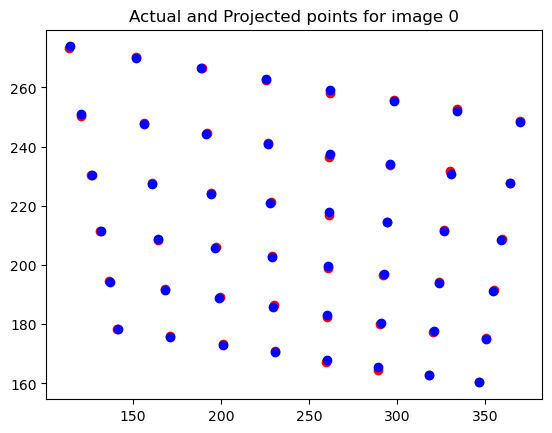

In [230]:
# Plot scatter for img = 0
img = 0
for i in range(n_rows):
    for j in range(n_cols):
        pixels = imgpoints[img, i, j, :]
        [x, y] = worldpoints[i, j]
        proj_pixels = H[img] @ (np.array([x, y, 1]).T)
        proj_pixels = proj_pixels/proj_pixels[-1]       # Normalize homogeneous coordinates 
        error[img] += np.linalg.norm(proj_pixels[:2] - pixels)
        plt.scatter(pixels[0], pixels[1], color='red')
        plt.scatter(proj_pixels[0], proj_pixels[1], color='blue')
plt.title('Actual and Projected points for image %d' %(img))
plt.show()

## 2.2.b

In [ ]:
# Create L
def v(img, i, j):
    """
    Return v(i,j) element for each image.
    """
    i-=1
    j-=1
    h = H[img]
    return np.array([h[0,i]*h[0,j], h[0,i]*h[1,j] + h[1,i]*h[0,j], h[1,i]*h[1,j], 
                    h[2,i]*h[0,j]+ h[0,i]*h[2,j], h[2,i]*h[1,j] + h[1,i]*h[2,j], h[2,i]*h[2,j]])

L = np.zeros((2*n_images,6))
for img in range(n_images):
    v12 = v(img, 1, 2)
    v11 = v(img, 1, 1)
    v22 = v(img, 2, 2)
    L[2*img:2*img + 2, :] = np.array([v12, v11 - v22]).reshape((2,6))

In [ ]:
# SVD
u, s, vh = np.linalg.svd(L)
b = vh[-1,:]
print('b = ', b)

b =  [-1.87416366e-06  4.52161879e-08 -1.82353913e-06  6.35144034e-04
  3.93405129e-04 -9.99999721e-01]


## 2.2.c

In [ ]:
# Intrinsic matrix (Zhang's Camera Calibration Algorithm: In-Depth Tutorial and Implementation)
w = b[0]*b[2]*b[5] - b[1]**2 *b[5] - b[0]* b[4]**2 + 2*b[1]*b[3]*b[4] - b[2]* b[3]**2
d = b[0]*b[2] - b[1]**2

alpha = np.sqrt(w/(d*b[0]))
beta = np.sqrt(w*b[0]/(d**2))
gamma = np.sqrt(w/(d**2 * b[0])) * b[1]
uc = (b[1]*b[4] - b[2]*b[3] / d)
vc = (b[1]*b[3] - b[0]*b[4] / d)

A = np.array([[alpha, gamma, uc], [0, beta, vc], [0, 0, 1]])
print('Intrinsic Matrix: \n', A)

Intrinsic Matrix: 
 [[608.12046299  14.87826209 339.09750434]
 [  0.         616.68839114 215.86628407]
 [  0.           0.           1.        ]]


## 2.3.a

In [ ]:
# Extrinsic matrix
T = np.zeros((n_images,3,4))

for img in range(n_images):
    lamb = 1 / np.linalg.norm(np.linalg.inv(A) @ H[img,:,0]) 
    T[img,:,0] = lamb * np.linalg.inv(A) @ H[img,:,0]
    T[img,:,1] = lamb * np.linalg.inv(A) @ H[img,:,1]
    T[img,:,2] = np.cross(T[img,:,0], T[img,:,1])
    T[img,:,3] = lamb * np.linalg.inv(A) @ H[img,:,2]

    T[img] /= T[img,-1,-1]      # Normalize SE(3) matrix

print('Intrinsic Matrix: \n', T)

Intrinsic Matrix: 
 [[[ 1.87014083e-03  1.97023719e-04 -6.18455451e-05 -3.64426351e-01]
  [-1.74626195e-04  1.05114943e-03 -1.53522044e-03 -8.05820211e-02]
  [ 1.43555579e-04 -1.53127175e-03 -1.06181748e-03  1.00000000e+00]]

 [[ 1.86043853e-03  4.81237303e-04 -1.11807924e-04 -3.05351776e-01]
  [-1.75959333e-04  1.07666611e-03  1.56401377e-03 -8.14679742e-02]
  [ 4.44597097e-04 -1.49983916e-03  1.08685953e-03  1.00000000e+00]]

 [[ 1.89424379e-03  7.98300846e-04 -3.99377705e-04 -4.27287113e-01]
  [-2.55381396e-04  1.33918920e-03  1.55221419e-03 -5.19913458e-02]
  [ 8.86323106e-04 -1.35292945e-03  1.30079579e-03  1.00000000e+00]]

 [[ 2.00060797e-03  1.08214498e-03 -6.47510679e-04 -3.10078335e-01]
  [-2.74271653e-04  1.56485030e-03  1.72919941e-03 -1.01934023e-01]
  [ 1.21746741e-03 -1.37951731e-03  1.45357929e-03  1.00000000e+00]]

 [[ 1.83071947e-03  9.93682042e-04 -6.10081940e-04 -3.57012450e-01]
  [-2.52619941e-04  1.43361944e-03  1.59408618e-03  1.62900485e-02]
  [ 1.15034198e-03 -

## 2.3.b

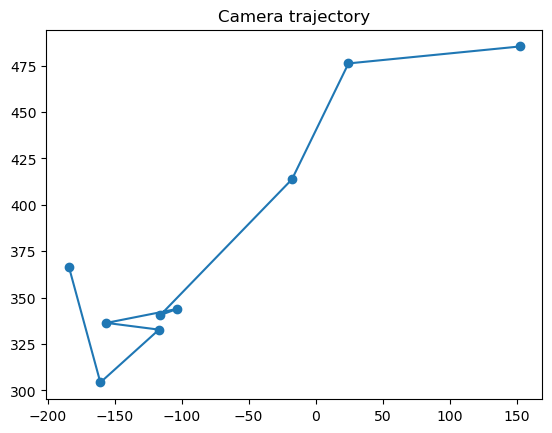

In [ ]:
# Camera coordinates (RC + t = 0)
C = np.zeros((n_images,2))
for img in range(n_images):
    coord = - np.linalg.inv(T[img,:,:3]) @ T[img,:,-1]
    C[img] = coord[:-1]

plt.plot(C[:,0], C[:,1])
plt.scatter(C[:,0], C[:,1])
plt.title('Camera trajectory')
plt.show()